## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 8
---------------------------------------

GOALS:

1. Load data into Python that you find online
2. Understand data types and fix some errors
3. Find your own data to play with

----------------------------------------------------------

This homework has **5 questions** and **1 problem**.

NOTE: Be kind to yourself. Working with data can be hard! Every data set is different. **Seriously** come get help! Come to lab!


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

You might need to install lxml. If you get a "ImportError: Missing optional dependency 'lxml'" Then uncomment and run the cell below

In [3]:
!conda install -y lxml

Jupyter detected...
3 channel Terms of Service accepted
Retrieving notices: done
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: done

## Package Plan ##

  environment location: C:\Users\brayd\anaconda3

  added / updated specs:
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.10.5  |       h4c7d964_0         153 KB  conda-forge
    certifi-2025.10.5          |     pyhd8ed1ab_0         156 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         309 KB

The following packages will be UPDATED:

  ca-certificates                       2025.8.3-h4c7d964_0 --> 2025.10.5-h4c7d964_0 
  certifi            pkgs/main/win-64::certifi-2025.8.3-py~ --> conda-forge/noarch::certifi-2025.10.5-pyhd8ed1ab_0 



certifi-2025.10.5    | 156 KB    |            |   0% 



==> WARNING: A newer version of conda exists. <==
    current version: 25.7.0
    latest version: 25.9.0

Please update conda by running

    $ conda update -n base -c conda-forge conda




## Try reading in some data - csv

Go to the [Cal Fire Website](https://www.fire.ca.gov/incidents) and scroll to the bottom to see the Incident Data. We will download the file named **ALL DATA AS CSV** this should put the data file into your Downloads folder. 

Next you need to move the file **mapdataall.csv** from your Downloads folder into your Day8 folder where you are doing your homework. You can open your Downloads folder and drag the file into JupyterLab side bar. Then I can run the command

    DF_raw = pd.read_csv('mapdataall.csv')

to load the data and look at the data frame.

In [4]:
DF = pd.read_csv('mapdataall.csv')

In [11]:
show(DF)

Loading ITables v2.5.2 from the internet... (need help?)


**Q1** How many variables and observations?

23 variables and 3345 entries.

**Q2** How many different incident types are there?

23

**Q3** Make a histogram of the acres burned and color the bars by whether or not the incident was a calfire incident. You will probably need to make a mask to remove very small and very large fires. How many fires burned more than 100,000 acres? What is the largest fire in the data?

**Extra Q** EXTRA - CHALLENGE - See if you can create a graph that answers the question: Are fires getting bigger or more frequent over time? You get complete creative control on how to answer this question!

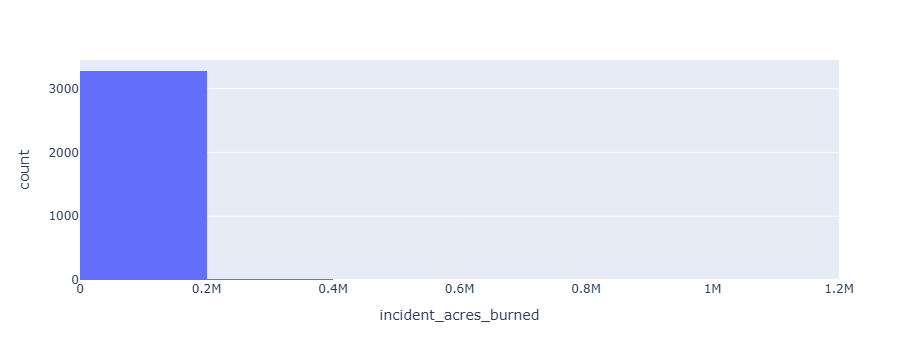

In [17]:
# You will need to write some code to answer the question 3.
mask = DF['incident_acres_burned'] > 100_000
DF_big = DF[mask]
px.histogram(DF, x='incident_acres_burned',nbins=10)

**(Click Here)**



In [12]:
# Extra Code


## Try reading in some data from Wikipedia - html

Here we will explore academy award winning films. Go to the [Wiki for the List of Academy Award Winning Films](https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films). Look at what type of data is there. How many tables? Any weird looking data?

Now we will read the html data into Python and show the data in DF[0]

In [18]:
# Here is some helper code
# This is code that will read in the data and then fix the Year column

#####
'''
NOTE: Many websites try to stop you from scraping even simple tables. 
    In just one year wikipedia made big changes... so I changed the code here.
    We can talk more about this code in class.
'''
import requests
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
my_website = "https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films"
response = requests.get(my_website, headers=headers)
#####

# Normal pandas code
DF = pd.read_html(response.content)
DF_raw = DF[0]
DF_raw['Year'] = DF_raw['Year'].apply(lambda x: int(x.split('/')[0]))
DF_raw

,Film,Year,Awards,Nominations
0,Anora,2024,5,6
1,The Brutalist,2024,3,10
2,Emilia Pérez,2024,2,13
3,Wicked,2024,2,10
4,Dune: Part Two,2024,2,5
...,...,...,...,...
1382,The Yankee Doodle Mouse,1943,1,1
1383,The Yearling,1946,2,7
1384,"Yesterday, Today and Tomorrow (Ieri, oggi, dom...",1964,1,1
1385,You Can't Take It with You,1938,2,7


**Q4** Following along with the lecture notes or video, fix the data in the 'Awards' column.

In [25]:
# Your code here
DF_raw['Awards'].mean()

TypeError: Could not convert string '532221111111117421111111111742111111111136211111111111132212221121111142111111223111113433111111111114322221111111110 (1)[1]36221111111111126311111111111114431111111111111373221111111343222111111111552111111111111443222111111163222111111111832211111111143221111111111111432221111111111133331111111111114522111111111111122111111111632211111111111442211111111111154411111111115422111111111175311111111111222111111192111111111111152222111111111110 (1)6222111111111111733211111111433211111111111542221111111173211111111110 (1)432221111111111433 (1)11111111111119311111111110 (1)43321111111111117221111111111118322111111110 (1)544211111110 (1)842111111111144 (1)3321111114322211 (1)1111154221111111110 (1)532111111111110 (1)46 (1)31 (1)111111113442111111110 (1)0 (1)5431111111110 (2)632111 (1)11111117221111111111381 (1)1111111115322211111111721111111111111343211111111115 (1)3211111111111110 (1)532221111111116532221111115532111111110 (1)321311111162131161112145115115211211111117 (1)10 (1)1120 (1)1112111111111121211711111111113113121111130 (1)111411111211111111111111112111113111111211111131111110 (2)211211111110 (1)0 (1)1180 (1)21 (1)13119111171118 (2)2111112121113211411114110 (1)2114111110 (1)1531311211111120 (1)4111510 (1)22 (1)111122111512111110 (1)1111117111231110 (2)11111224311111114511211113210 (1)11111211161111811221111111111111211181211111112221112610 (1)1111111111112110 (1)1121221323120 (1)141111 (1)1112121111110 (1)1111110 (1)1111241 (1)111140 (1)111121111 (1)13114111331110 (1)1110 (1)1111131111112111111111111134111111131111211111111111110 (1)1111101111111111521111211111111312123' to numeric

In [24]:
DF_raw['Year'] = DF_raw['Year'].apply(lambda x: str(x).split('(')[0])

In [26]:
year_data = DF_raw['Year'].value_counts()
DF_year = year_data.reset_index().rename(columns={"index": "value", 0: "count"})
DF_year

,Year,count
0,1945,21
1,1949,20
2,1942,20
3,1950,19
4,1941,19
...,...,...
92,1931,10
93,1932,9
94,1928,7
95,1929,6


**Q5** Now try to fix the data in the "Nominations" column - see if you can do it without looking at the answer.

In [27]:
# Your code here
nom_data = DF_raw['Nominations'].value_counts()
DF_nom = nom_data.reset_index().rename(columns={"index": "value", 0: "count"})
show(DF_nom)
print('I can see that I want the data to the left of the [ character')

DF_raw['Nominations'] = DF_raw['Nominations'].apply(lambda x: int(x.split('[')[0]))
award_data = DF_raw['Awards'].value_counts()
DF_award = award_data.reset_index().rename(columns={"index": "value", 0: "count"})
show(DF_award)

DF_raw.dtypes

Loading ITables v2.5.2 from the internet... (need help?)


I can see that I want the data to the left of the [ character


Loading ITables v2.5.2 from the internet... (need help?)


Film           object
Year           object
Awards         object
Nominations     int64
dtype: object

## Problem 1

Your homework today will be to see if you can find some data of your own. This can be the first steps you take toward your final project. 

You should:

* Find some data online
* Read that data into Python using the Pandas commands we learned
* Look at the DataFrame - number of variables, number of observations, AND the dtypes. Comment on what you see.
* Try to do summary statistics (.describe()). Does it work like expected?
* Attempt to fix any data, or explain why the data does not need to be fixed.
* Make some sort of graph using columns in your data.

In [38]:
pip install nba_api pandas

In [39]:
    from nba_api.stats.endpoints import playercareerstats
    import pandas as pd

    # Fetch career stats for LeBron James (Player ID: 2544)
    career = playercareerstats.PlayerCareerStats(player_id='2544')
    career_data = career.get_data_frames()[0] # The first DataFrame typically contains overall career stats

In [44]:
 career_data.to_csv('lebron_career_stats.csv', index=False)
print("LeBron James' career statistics saved to 'lebron_career_stats.csv'")

LeBron James' career statistics saved to 'lebron_career_stats.csv'


In [46]:
DF = pd.read_csv('lebron_career_stats.csv')

In [47]:
show (DF)

Loading ITables v2.5.2 from the internet... (need help?)
